In [18]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt 
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

In [19]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [20]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [21]:
ram = {'MM': 'MoveMethod','PD':'PushDownMethod','PU':'PullUpMethod','EM':'ExtractMethod','IM':'InlineMethod'}
rac = {'EC':'ExtractClass','MM': 'MoveMethod','PU': 'PullUpMethod','PD':'PushDownMethod'}
files = glob("../Resources/refactoring_files/*.csv")
li = []
for filename in files:
    df = pd.read_csv(filename, header=None)
    li.append(df)
data = pd.concat(li, axis=0, ignore_index=True)

In [22]:


#TODO METHODS
dim = pd.read_csv("../Resources/csv_files/input_cluster/input_method.csv")
for item in data[0]:
    try: 
        refactoring_type = item.split("(")[0]
        item = item.split("(")[1].split(",")[0] + "()"
        key = list(ram.keys())[list(ram.values()).index(refactoring_type)]
        if (dim["Method"] == item).any():
            if key  == 'MM':
                dim.update(pd.DataFrame(
                {'Method': item, 'MM': dim.loc[dim['Method'] == item]['MM'] + 1, 'PU': dim.loc[dim['Method'] == item]['PU'],
                 'PD': dim.loc[dim['Method'] == item]['PD'], 'EM': dim.loc[dim['Method'] == item]['EM'],
                 'IM': dim.loc[dim['Method'] == item]['IM']}), ignore_index=True)
            elif key == 'PU':
                dim.update(pd.DataFrame(
                    {'Method': item, 'MM': dim.loc[dim['Method'] == item]['MM'], 'PU': dim.loc[dim['Method'] == item]['PU'] + 1,
                     'PD': dim.loc[dic['Method'] == item]['PD'], 'EM': dim.lom[dic['Method'] == item]['EM'],
                     'IM': dim.loc[dic['Method'] == item]['IM']}), ignore_index=True)
            elif key == 'PD':
                dim.update(pd.DataFrame(
                    {'Method': item, 'MM': dim.loc[dim['Method'] == item]['MM'], 'PU': dim.loc[dim['Method'] == item]['PU'],
                     'PD': dim.loc[dim['Method'] == item]['PD'] + 1, 'EM': dim.loc[dic['Method'] == item]['EM'],
                     'IM': dim.loc[dim['Method'] == item]['IM']}), ignore_index=True)
            elif key == 'EM':
                dim.update(pd.DataFrame(
                    {'Method': item, 'MM': dim.loc[dim['Method'] == item]['MM'], 'PU': dim.loc[dim['Method'] == item]['PU'],
                     'PD': dim.loc[dim['Method'] == item]['PD'], 'EM': dim.loc[dim['Method'] == item]['EM'] + 1,
                     'IM': dim.loc[dim['Method'] == item]['IM']}), ignore_index=True)
            elif key == 'IM':
                dim.update(pd.DataFrame(
                    {'Method': item, 'MM': dim.loc[dim['Method'] == item]['MM'], 'PU': dim.loc[dim['Method'] == item]['PU'],
                     'PD': dim.loc[dim['Method'] == item]['PD'], 'EM': dim.loc[dim['Method'] == item]['EM'],
                     'IM': dim.loc[dim['Method'] == item]['IM'] + 1}), ignore_index=True)
        else :
            if key  == 'MM':
                dim = dim.append({'Method':item,'MM': 1,'PU': 0,'PD': 0,'EM': 0,'IM': 0}, ignore_index=True)
            elif key  == 'PU':
                dim = dim.append({'Method':item,'MM': 0,'PU': 1,'PD': 0,'EM': 0,'IM': 0}, ignore_index=True)
            elif key  == 'PD':
                dim = dim.append({'Method':item,'MM': 0,'PU': 0,'PD': 1,'EM': 0,'IM': 0}, ignore_index=True)
            elif key  == 'EM':
                dim = dim.append({'Method':item,'MM': 0,'PU': 0,'PD': 0,'EM': 1,'IM': 0}, ignore_index=True)
            elif key  == 'IM':
                dim = dim.append({'Method':item,'MM': 0,'PU': 0,'PD': 0,'EM': 0,'IM': 1}, ignore_index=True)
    except:
        continue

dim.to_csv("../Resources/csv_files/input_cluster/input_method.csv", encoding='utf-8', index=False)
dim

,Method,MM,PU,PD,EM,IM
0,org.wordpress.android.ui.prefs.SiteSettingsFra...,0,0,0,1,0
1,org.wordpress.android.ui.main.SitePickerAdapte...,0,0,0,1,0
2,org.wordpress.android.ui.main.WPMainActivity.o...,0,0,0,1,0
3,org.wordpress.android.ui.stats.StatsUtils.open...,0,0,0,1,0
4,org.wordpress.android.models.Blog.getIconImage...,0,0,0,1,0
...,...,...,...,...,...,...
281,jetbrains.mps.project.AbstractModule.rename(),0,0,0,1,0
282,jetbrains.mps.ide.ui.tree.MPSTree.stringToPath(),0,0,0,1,0
283,jetbrains.mps.lang.editor.cellProviders.Single...,0,0,0,0,1
284,jetbrains.mps.text.impl.TextGenSupport.appendN...,0,0,0,1,0


In [23]:
dic = pd.read_csv("../Resources/csv_files/input_cluster/input_class.csv")
for item in data[0]:
    try: 
        refactoring_type = item.split("(")[0]
        key = list(rac.keys())[list(rac.values()).index(refactoring_type)]
        if key == "EC":
            item = item.split("(")[1].split(",")[0]
        else:
            item = item.split("(")[1].split(",")[0]
            temp = item.split(".")
            item = item.replace("."+temp[len(temp)-1], "")
        if (dic["Class"] == item).any():
            if key  == 'EC':
                dic.update(pd.DataFrame({'Class': item, 'EC': dic.loc[dic['Class'] == item]['EC'] + 1,'MM': dic.loc[dic['Class'] == item]['MM'],'PU': dic.loc[dic['Class'] == item]['PU'],'PD': dic.loc[dic['Class'] == item]['PD']}))
            elif key  == 'MM':
                dic.update(pd.DataFrame({'Class': item, 'EC': dic.loc[dic['Class'] == item]['EC'],'MM': dic.loc[dic['Class'] == item]['MM']+1,'PU': dic.loc[dic['Class'] == item]['PU'],'PD': dic.loc[dic['Class'] == item]['PD']}))
            elif key  == 'PU':
                dic.update(pd.DataFrame({'Class': item, 'EC': dic.loc[dic['Class'] == item]['EC'],'MM': dic.loc[dic['Class'] == item]['MM'],'PU': dic.loc[dic['Class'] == item]['PU'] + 1,'PD': dic.loc[dic['Class'] == item]['PD']}))
            elif key  == 'PD':
                dic.update(pd.DataFrame({'Class': item, 'EC': dic.loc[dic['Class'] == item]['EC'],'MM': dic.loc[dic['Class'] == item]['MM'],'PU': dic.loc[dic['Class'] == item]['PU'],'PD': dic.loc[dic['Class'] == item]['PD']+1}))
        else :
            
            if key  == 'EC':
                dic = dic.append({'Class':item,'EC': 1,'MM': 0,'PU': 0,'PD': 0}, ignore_index=True)
            elif key  == 'MM':
                dic = dic.append({'Class':item,'EC': 0,'MM': 1,'PU': 0,'PD': 0}, ignore_index=True)
            elif key  == 'PU':
                dic = dic.append({'Class':item,'EC': 0,'MM': 0,'PU': 1,'PD': 0}, ignore_index=True)
            elif key  == 'PD':
                dic = dic.append({'Class':item,'EC': 0,'MM': 0,'PU': 0,'PD': 1}, ignore_index=True)
    except Exception as e:
        print("ERROR : ", e)
        continue
dic.to_csv("../Resources/csv_files/input_cluster/input_class.csv", encoding='utf-8', index=False)
dic

ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'InlineMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
ERROR :  'ExtractMethod' is not in list
E

,Class,EC,MM,PU,PD
0,io.fabric8.maven.JsonMojo,0.0,0.0,6.0,0.0
1,io.fabric8.maven.ApplyMojo,0.0,0.0,12.0,0.0
2,com.hazelcast.client.protocol.generator.CodecM...,0.0,6.0,0.0,0.0
3,com.hazelcast.jca.AbstractDeploymentTest,0.0,0.0,0.0,6.0
4,com.hazelcast.cache.impl.operation.CacheCreate...,6.0,0.0,0.0,0.0
5,org.deeplearning4j.plot.ListenerTest,0.0,6.0,0.0,0.0
6,mortar.ObjectGraphServiceTest,0.0,36.0,0.0,0.0
7,org.gradle.play.plugins.PlayApplicationPlugin....,0.0,6.0,0.0,0.0
8,org.gradle.testkit.functional.GradleRunner,0.0,0.0,0.0,48.0
9,org.neo4j.kernel.impl.api.store.DiskLayer,0.0,24.0,0.0,0.0


In [24]:
try:
    del dic["Class"]
except:
    print("No col Class")

InvalidIndexError: (slice(None, None, None), 0)

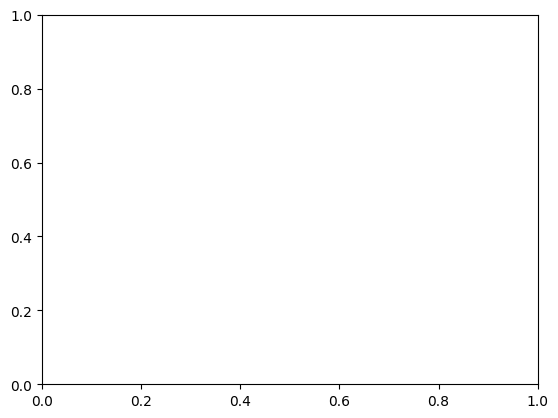

In [25]:
# del dic["Class"]
plot_gmm(GaussianMixture(n_components=10), dic)
# plt.figure(figsize=((10,8)))
# plt.scatter(dic[:,0], dic[:,1], label="data")
# plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
# plt.legend()
# plt.show() 